In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
titanic_df = pd.read_csv("dataSet/train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df.dropna(axis = 1, thresh = len(titanic_df)/2, inplace = True)

In [5]:
big = titanic_df["Embarked"].value_counts().idxmax()
titanic_df["Embarked"].fillna(big, inplace = True)

In [6]:

pattern = r", (.*?)\."

titanic_df["Title"] = titanic_df["Name"].apply(lambda x: re.search(pattern, x).group(1))

In [7]:
titanic_df['Age'] = titanic_df.groupby('Title')['Age'].transform(lambda x: x.fillna(round(x.mean(),0)))

In [8]:
titanic_df.isnull().sum().sum()

0

In [9]:
titanic_df.drop(['Name', "Ticket", "PassengerId"], axis=1, inplace=True)

In [10]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,22.0,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


<AxesSubplot:xlabel='Age', ylabel='Count'>

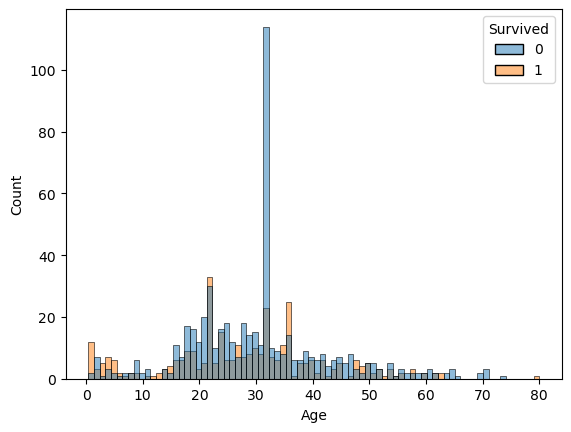

In [11]:
sns.histplot(data = titanic_df, x = "Age", bins = 80, hue = "Survived")

<AxesSubplot:xlabel='Age', ylabel='Count'>

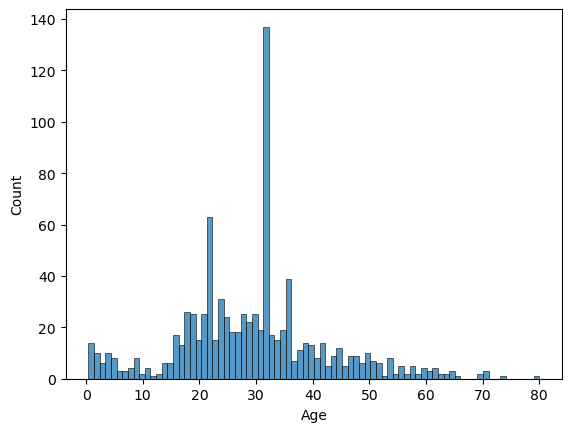

In [12]:
sns.histplot(data = titanic_df, x = "Age", bins = 80)

<AxesSubplot:xlabel='Age', ylabel='Count'>

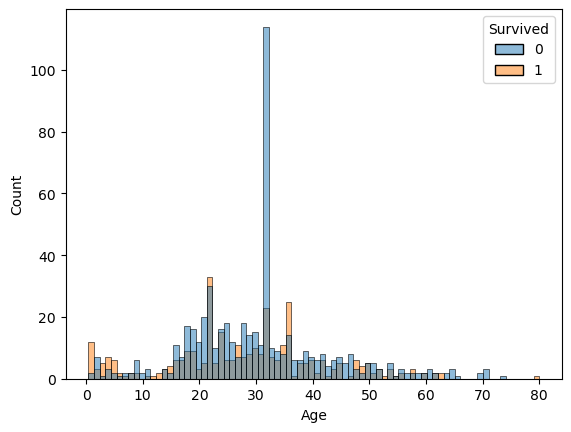

In [13]:
sns.histplot(data = titanic_df, x = "Age", bins = 80, hue = "Survived")

In [14]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 15: cat = 'Child'
    elif age <= 20: cat = 'Teenager'
    elif age <= 30: cat = 'Twenties'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 50: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

In [15]:
titanic_df["Age_cat"] = titanic_df['Age'].apply(lambda x : get_category(x))

In [16]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_cat
0,0,3,male,22.0,1,0,7.2500,S,Mr,Twenties
1,1,1,female,38.0,1,0,71.2833,C,Mrs,Adult
2,1,3,female,26.0,0,0,7.9250,S,Miss,Twenties
3,1,1,female,35.0,1,0,53.1000,S,Mrs,Young Adult
4,0,3,male,35.0,0,0,8.0500,S,Mr,Young Adult
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev,Twenties
887,1,1,female,19.0,0,0,30.0000,S,Miss,Teenager
888,0,3,female,22.0,1,2,23.4500,S,Miss,Twenties
889,1,1,male,26.0,0,0,30.0000,C,Mr,Twenties


<AxesSubplot:xlabel='Age_cat', ylabel='Count'>

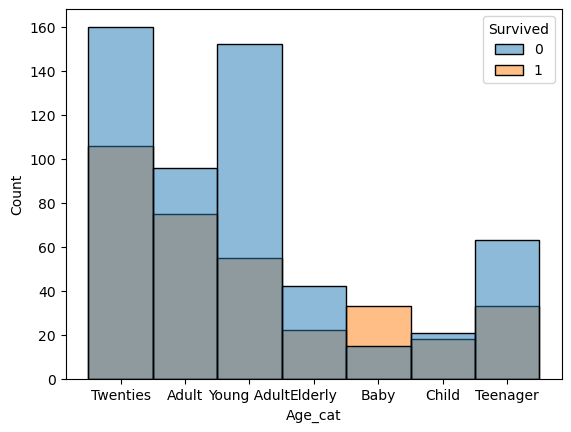

In [17]:
sns.histplot(data = titanic_df, x = "Age_cat", hue = "Survived")

In [18]:
li = []
for i in titanic_df["Age_cat"].unique():
    surv = len(titanic_df[(titanic_df["Age_cat"] == i) & (titanic_df["Survived"] == 1)]) 
    dead = len(titanic_df[(titanic_df["Age_cat"] == i) & (titanic_df["Survived"] == 0)])
    v = surv/(surv+dead)
    li.append(v)

<AxesSubplot:>

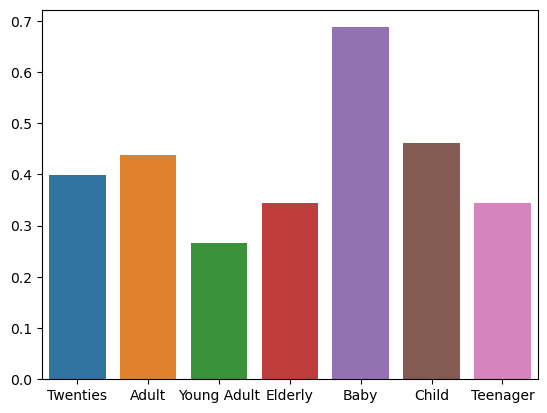

In [19]:
# 나이 카테고리 별 생존률 그래프
sns.barplot(x = titanic_df["Age_cat"].unique(), y = li)

In [20]:
def Fare_Cat(fare):
    cat = ''
    if fare <= -1: cat = 'Unknown'
    elif fare <= 8: cat = 'Very Low'
    elif fare <= 11: cat = 'Low'
    elif fare <= 25: cat = 'Middle'
    elif fare <= 50: cat = 'High'
    elif fare <= 100: cat = 'Very High'
    else : cat = 'Extra High'
    
    return cat

In [21]:
titanic_df["Fare_cat"] = titanic_df['Fare'].apply(lambda x : Fare_Cat(x))

<AxesSubplot:xlabel='Fare_cat', ylabel='Count'>

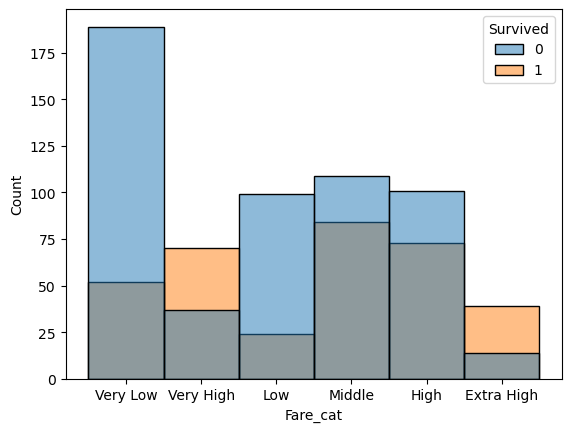

In [22]:
sns.histplot(data = titanic_df, x = "Fare_cat", hue = "Survived")

In [23]:
for i in range(11):
    p = titanic_df["Fare"].quantile(0.1 * i)
    print(i*10, len(titanic_df[titanic_df["Fare"] < p]))

0 0
10 88
20 166
30 242
40 339
50 440
60 535
70 622
80 709
90 801
100 888


In [24]:
for i in range(11):
    print(i*10, titanic_df["Fare"].quantile(0.1 * i))

0 0.0
10 7.55
20 7.8542
30 8.05
40 10.5
50 14.4542
60 21.67920000000004
70 27.0
80 39.6875
90 77.9583
100 512.3292


<AxesSubplot:xlabel='Fare', ylabel='Count'>

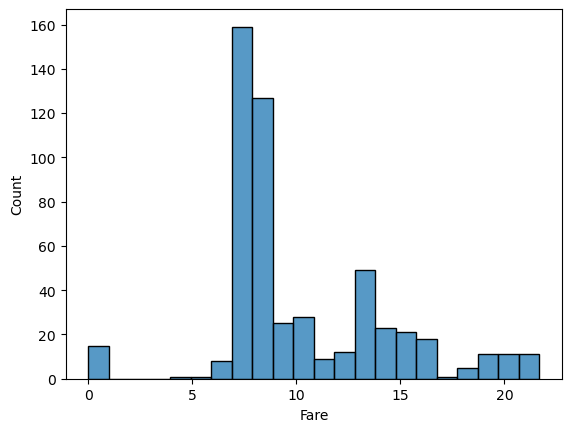

In [25]:
sns.histplot(data = titanic_df[titanic_df["Fare"] < 22], x = "Fare",  bins =22)

In [26]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_cat,Fare_cat
0,0,3,male,22.0,1,0,7.2500,S,Mr,Twenties,Very Low
1,1,1,female,38.0,1,0,71.2833,C,Mrs,Adult,Very High
2,1,3,female,26.0,0,0,7.9250,S,Miss,Twenties,Very Low
3,1,1,female,35.0,1,0,53.1000,S,Mrs,Young Adult,Very High
4,0,3,male,35.0,0,0,8.0500,S,Mr,Young Adult,Low
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev,Twenties,Middle
887,1,1,female,19.0,0,0,30.0000,S,Miss,Teenager,High
888,0,3,female,22.0,1,2,23.4500,S,Miss,Twenties,Middle
889,1,1,male,26.0,0,0,30.0000,C,Mr,Twenties,High


In [27]:
titanic_df.drop(["Age", "Fare"] , axis=1, inplace=True)

In [28]:
titanic_df = pd.get_dummies(titanic_df, columns=['Pclass'])
titanic_df = pd.get_dummies(titanic_df, columns=['Sex'])
titanic_df = pd.get_dummies(titanic_df, columns=['SibSp'])
titanic_df = pd.get_dummies(titanic_df, columns=['Parch'])
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic_df = pd.get_dummies(titanic_df, columns=['Title'])
titanic_df = pd.get_dummies(titanic_df, columns=['Age_cat'])
titanic_df = pd.get_dummies(titanic_df, columns=['Fare_cat'])

In [29]:
titanic_df

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Age_cat_Elderly,Age_cat_Teenager,Age_cat_Twenties,Age_cat_Young Adult,Fare_cat_Extra High,Fare_cat_High,Fare_cat_Low,Fare_cat_Middle,Fare_cat_Very High,Fare_cat_Very Low
0,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
887,1,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
888,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
889,1,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [30]:
def transform_features(df):
    df.dropna(axis = 1, thresh = len(titanic_df)/2, inplace = True)
    
    big = df["Embarked"].value_counts().idxmax()
    df["Embarked"].fillna(big, inplace = True)
    
    pattern = r", (.*?)\."
    df["Title"] = df["Name"].apply(lambda x: re.search(pattern, x).group(1))
    
    df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(round(x.mean(),0)))
    
    df.drop(['Name', "Ticket", "PassengerId", "SibSp", "Parch", "Embarked"], axis=1, inplace=True)
    
    df["Age_cat"] = df['Age'].apply(lambda x : get_category(x))
    
    df["Fare_cat"] = df['Fare'].apply(lambda x : Fare_Cat(x))
    
    df.drop(["Age", "Fare"] , axis=1, inplace=True)
    
    features = ["Pclass", "Sex", "Title", "Age_cat", "Fare_cat"]
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df
    

In [33]:
titanic_df = pd.read_csv('dataSet/train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [36]:
X_titanic_df

,Pclass,Sex,Title,Age_cat,Fare_cat
0,2,1,11,5,5
1,0,0,12,0,4
2,2,0,8,5,5
3,0,0,12,6,4
4,2,1,11,6,2
...,...,...,...,...,...
886,1,1,14,5,3
887,0,0,8,4,1
888,2,0,8,5,3
889,0,1,11,5,1


In [34]:
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)
dt_clf = DecisionTreeClassifier(random_state=11)

In [35]:
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.8547
